# Part 1: Data preprocessing

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
dataset.shape

(1338, 7)

## Exploratory Data Analysis

In [5]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# statistical summary
dataset.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### Group the dataset by 'sex', 'smoker' and 'region'

In [7]:
dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
dataset_sex = dataset.groupby(by='sex')
dataset_sex.mean()

age        bmi  children       charges
sex                                                 
female  39.503021  30.377749  1.074018  12569.578844
male    38.917160  30.943129  1.115385  13956.751178

In [9]:
dataset_smoker = dataset.groupby(by='smoker')
dataset_smoker.mean()

age        bmi  children       charges
smoker                                              
no      39.385338  30.651795  1.090226   8434.268298
yes     38.514599  30.708449  1.113139  32050.231832

In [10]:
dataset_reg = dataset.groupby(by='region')
dataset_reg.mean()
# Seems like south east region has the highest charges and body mass index

age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377

## Dealing with the missing data

In [11]:
# check if there are any null values
dataset.isnull().values.any()

False

In [12]:
# check how many null values
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [13]:
dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [14]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
len(dataset.select_dtypes(include='object').columns)

3

In [16]:
# check unique values in each column

In [17]:
# Check the unique values in column 'sex'
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
# Check the unique values in column 'smoker'
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
# Check the unique values in column 'region'
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [21]:
dataset.head()

age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 9 columns]

In [22]:
dataset.shape

(1338, 9)

## Correlation matrix and Heatmap

In [23]:
dataset_2 = dataset.drop(columns='charges')

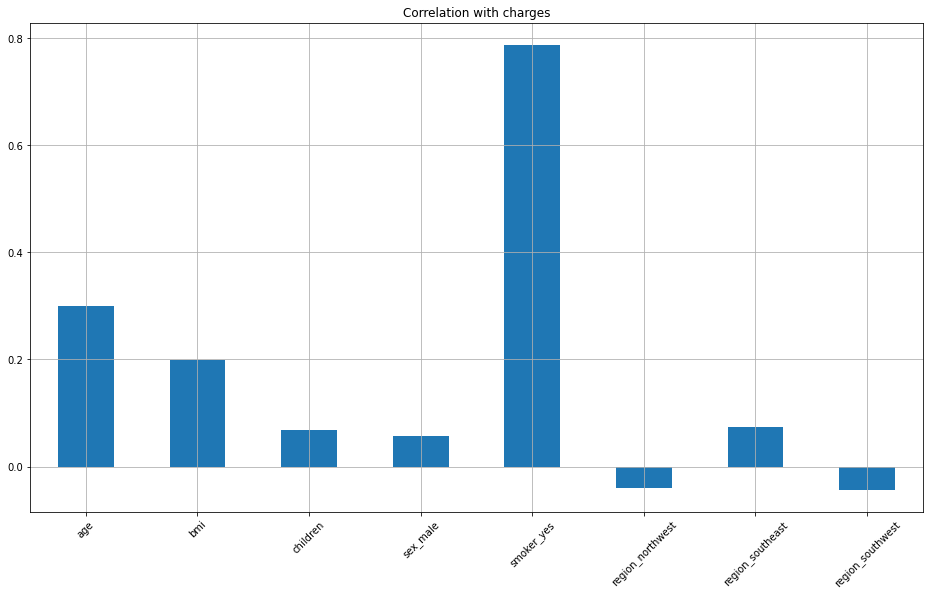

In [24]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges', 
    rot = 45, grid = True
)

In [25]:
# Create Correlation Matrix
corr = dataset.corr()

In [26]:
corr

age       bmi  ...  region_southeast  region_southwest
age               1.000000  0.109272  ...         -0.011642          0.010016
bmi               0.109272  1.000000  ...          0.270025         -0.006205
children          0.042469  0.012759  ...         -0.023066          0.021914
charges           0.299008  0.198341  ...          0.073982         -0.043210
sex_male         -0.020856  0.046371  ...          0.017117         -0.004184
smoker_yes       -0.025019  0.003750  ...          0.068498         -0.036945
region_northwest -0.000407 -0.135996  ...         -0.346265         -0.320829
region_southeast -0.011642  0.270025  ...          1.000000         -0.346265
region_southwest  0.010016 -0.006205  ...         -0.346265          1.000000

[9 rows x 9 columns]

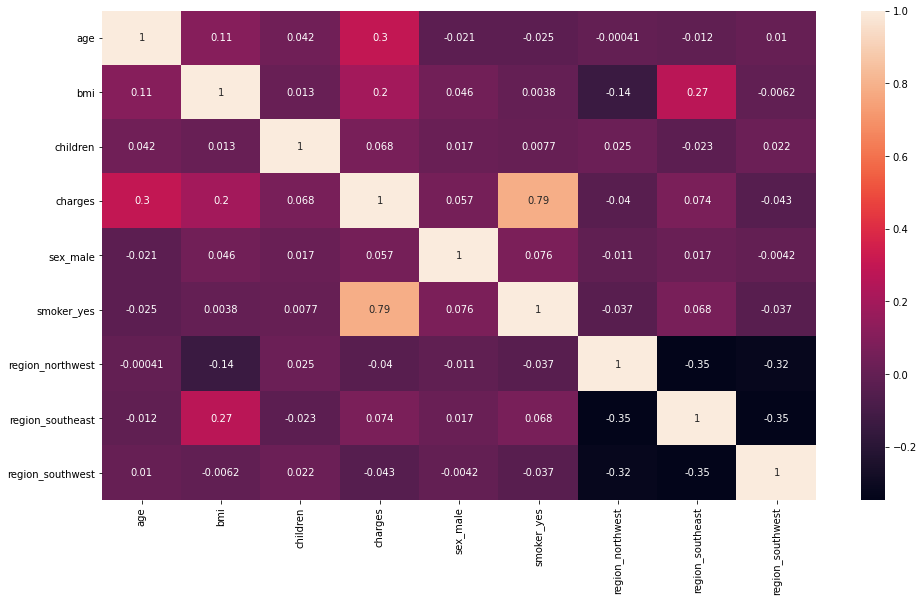

In [27]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [28]:
dataset.head()

age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 9 columns]

In [29]:
# matrix of features / inependent variables
x = dataset.drop(columns='charges')

In [30]:
x

age     bmi  ...  region_southeast  region_southwest
0      19  27.900  ...                 0                 1
1      18  33.770  ...                 1                 0
2      28  33.000  ...                 1                 0
3      33  22.705  ...                 0                 0
4      32  28.880  ...                 0                 0
...   ...     ...  ...               ...               ...
1333   50  30.970  ...                 0                 0
1334   18  31.920  ...                 0                 0
1335   18  36.850  ...                 1                 0
1336   21  25.800  ...                 0                 1
1337   61  29.070  ...                 0                 0

[1338 rows x 8 columns]

In [31]:
# dependent variable vector
y = dataset.iloc[:, 3:4].values

In [32]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
x_train.shape

(1070, 8)

In [35]:
x_test.shape

(268, 8)

In [36]:
y_train.shape

(1070, 1)

In [37]:
y_test.shape

(268, 1)

## Feature scaling

In [38]:
# there is an implicit equation i.e. implicit relationship between the dependent variable Y and the
# features X
# not explecit relationship like multiple linear regression

# so we have to apply feature scaling in SVR

In [39]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

# Part 2: Building the model

## 3) Support vector regression

In [40]:
from sklearn.svm import SVR
regressor_sv = SVR(kernel='rbf', degree=3)
regressor_sv.fit(x_train,y_train)

# kernel='rbf': it is non linear kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred = sc_y.inverse_transform(regressor_sv.predict(sc_x.transform(x_test)))

In [42]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [43]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8575248736509351

## 4) XGBoost regression

In [72]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

[13:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [45]:
y_pred = sc_y.inverse_transform(regressor_xgb.predict(sc_x.transform(x_test)))

In [46]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8621817830938563

# Part 3: Predict charges for a new customer

## Example 1

Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast


In [47]:
dataset.head()

age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 9 columns]

In [48]:
data = {'age':40,
        'bmi':45.50,
        'children':4,
        'sex':1,       
        'smoker':1,
        'region_northwest':0,
        'region_southeast':0,
        'region_southwest':0
}

In [49]:
df_frank = pd.DataFrame(data=data, index=[1])

In [50]:
df_frank

age   bmi  children  ...  region_northwest  region_southeast  region_southwest
1   40  45.5         4  ...                 0                 0                 0

[1 rows x 8 columns]

In [51]:
frank_pred = sc_y.inverse_transform(regressor_xgb.predict(sc_x.transform(df_frank)))

In [52]:
print(' The medical insurance cost for Frank is: {} '.format(frank_pred))

 The medical insurance cost for Frank is: [38005.016] 


## Example 2

In [53]:
data = {'age':19,
        'bmi':27.9,
        'children':0,
        'sex':0,       
        'smoker':1,
        'region_northwest':0,
        'region_southeast':0,
        'region_southwest':1
}

In [54]:
df = pd.DataFrame(data=data, index=[1])

In [55]:
df

age   bmi  children  ...  region_northwest  region_southeast  region_southwest
1   19  27.9         0  ...                 0                 0                 1

[1 rows x 8 columns]

In [56]:
sc_y.inverse_transform(regressor_xgb.predict(sc_x.transform(df)))
# original value: # 16884.92400	

array([19856.746], dtype=float32)